In [44]:
import pretty_midi
import numpy as np
from music21 import converter, environment
import IPython.display as ipd
import librosa
import pathlib
import matplotlib.pyplot as plt
import jams
from sklearn.decomposition import NMF
from interpreter import jams_to_midi, visualize_jams_note

In [3]:
jam_file_path = '/Users/francesco/Desktop/audio2midi/guitarset/annotation/01_BN1-129-Eb_comp.jams'
audio_path = '/Users/francesco/Desktop/audio2midi/guitarset/audio_hex-pickup_debleeded/01_BN1-129-Eb_comp_hex_cln.wav'
jam = jams.load(jam_file_path)
audio, sr = librosa.load(audio_path, sr=None)

In [4]:
#resample to 22050
audio2 = librosa.resample(audio, orig_sr=sr, target_sr=22050)

In [5]:
ipd.Audio(audio, rate=sr)

In [6]:
ipd.Audio(audio2, rate=22050)

In [7]:
hop_length = 512 #number of samples between frames
sr = 22050 #number of samples per second
#4 octaves (E2 to E6) + 4 notes or semitones (C2 to E2) = 4*12 + 4 = 52
n_notes = 52
bins_per_semitone = 3
bins_per_octave = bins_per_semitone * 12 #3*12 = 36
n_bins = bins_per_semitone * n_notes #3*52 = 156
fmin = librosa.midi_to_hz(36)  # Starting frequency (MIDI 36 = C2)

In [8]:
audio_path = '/Users/francesco/Desktop/audio2midi/guitarset/audio_hex-pickup_debleeded/01_BN1-129-Eb_comp_hex_cln.wav'
jam = jams.load(jam_file_path)
audio, sr = librosa.load(audio_path, sr=22050)

In [19]:
CQT = librosa.cqt(audio, sr=sr, fmin=fmin, bins_per_octave=bins_per_octave, n_bins=n_bins)

In [20]:

# Plot the CQT (magnitude)
CQT_dB = librosa.amplitude_to_db(np.abs(CQT), ref=np.max)

In [ ]:
## passa alto per eliminare note fuori range nell'audio
#signal per applicare il filtro passa alto

/var/folders/g1/_jmd0tb55d58p50yyylwr0_00000gn/T/ipykernel_19010/2914154029.py:2: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(CQT_dB, sr=sr, x_axis='time', y_axis='cqt_hz')


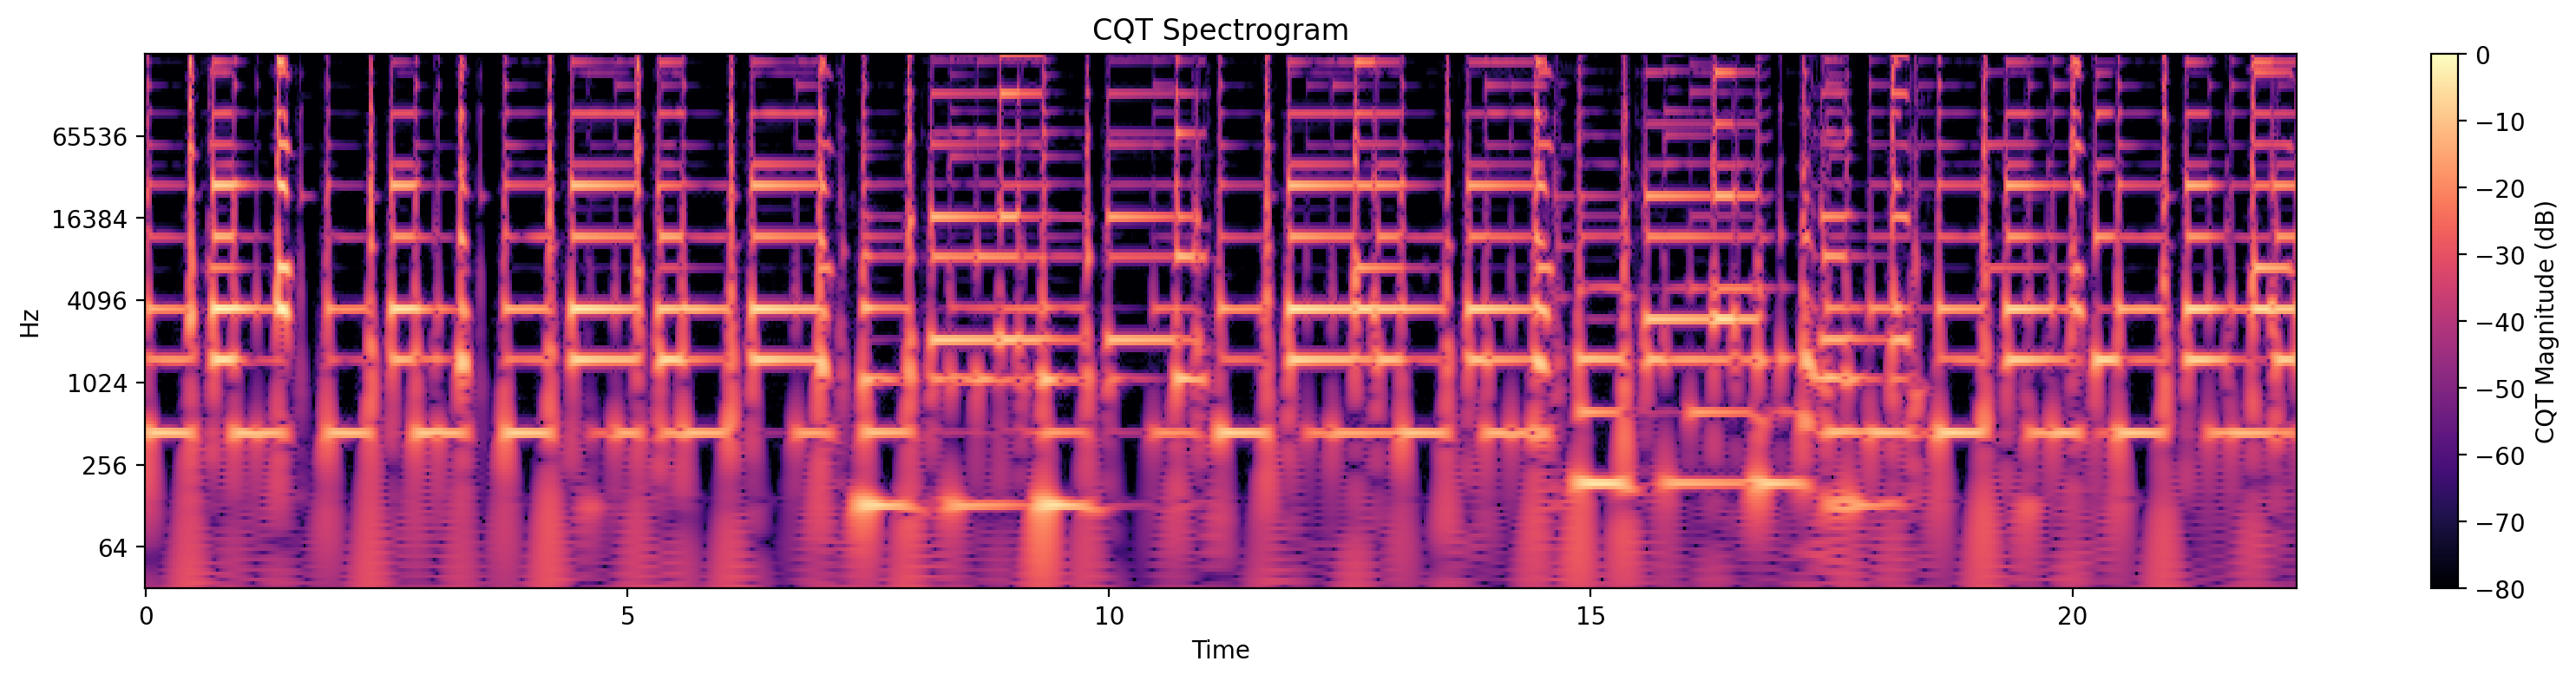

(156, 962)


In [26]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(CQT_dB, sr=sr, x_axis='time', y_axis='cqt_hz')
plt.colorbar(label='CQT Magnitude (dB)')
plt.title('CQT Spectrogram')
plt.show()
print(CQT_dB.shape)

In [21]:
CQT_norm = (CQT_dB - CQT_dB.min()) / (CQT_dB.max() - CQT_dB.min())

In [42]:
def nmf(CQT_norm, n_components=10):
    model = NMF(n_components=n_components, init='random', random_state=0)
    W = model.fit_transform(CQT_norm)  # Spectral bases
    H = model.components_  # Activations
    CQT_clean = np.dot(W, H)  # Reconstruct the cleaned CQT
    return CQT_clean

In [27]:
def myplot(img):
    plt.figure(figsize=(20, 4))
    librosa.display.specshow(img, sr=sr, x_axis='time', y_axis='cqt_hz')
    plt.show()

/var/folders/g1/_jmd0tb55d58p50yyylwr0_00000gn/T/ipykernel_19010/927873821.py:2: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(CQT_norm, sr=sr, x_axis='time', y_axis='cqt_hz')


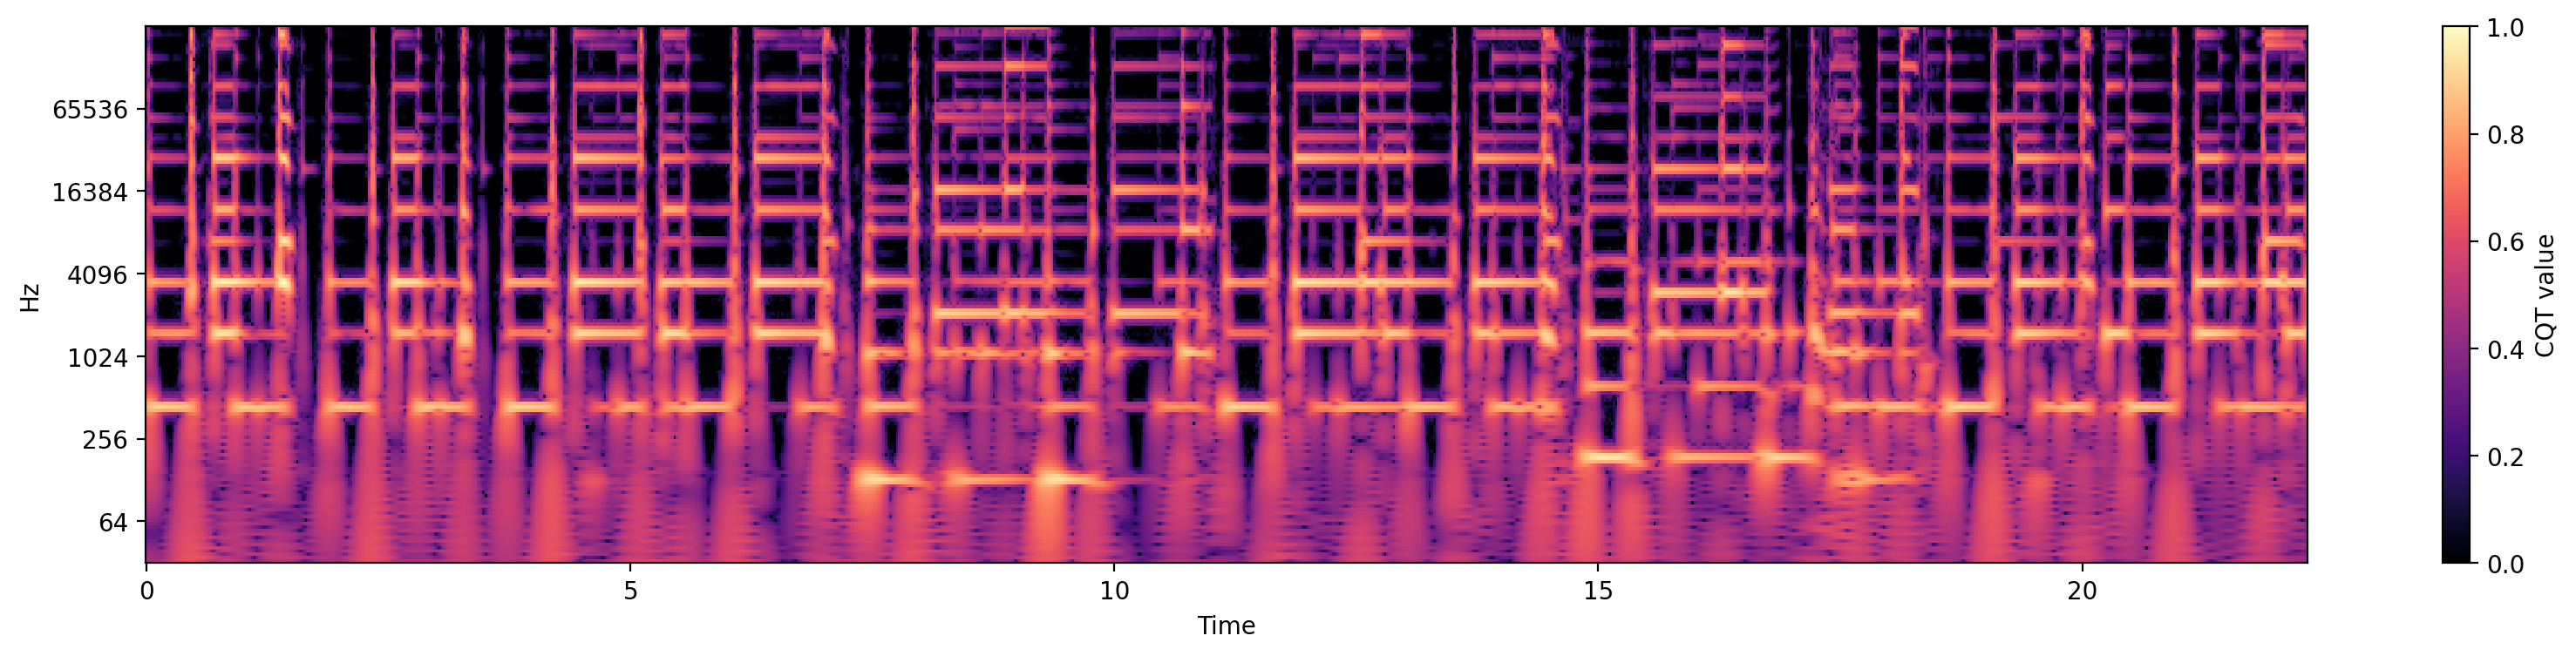

(156, 962)


In [29]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(CQT_norm, sr=sr, x_axis='time', y_axis='cqt_hz')
plt.colorbar(label='CQT value')
plt.show()
print(CQT_norm.shape)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/var/folders/g1/_jmd0tb55d58p50yyylwr0_00000gn/T/ipykernel_27528/1179893472.py:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(img, sr=sr, x_axis='time', y_axis='cqt_hz')


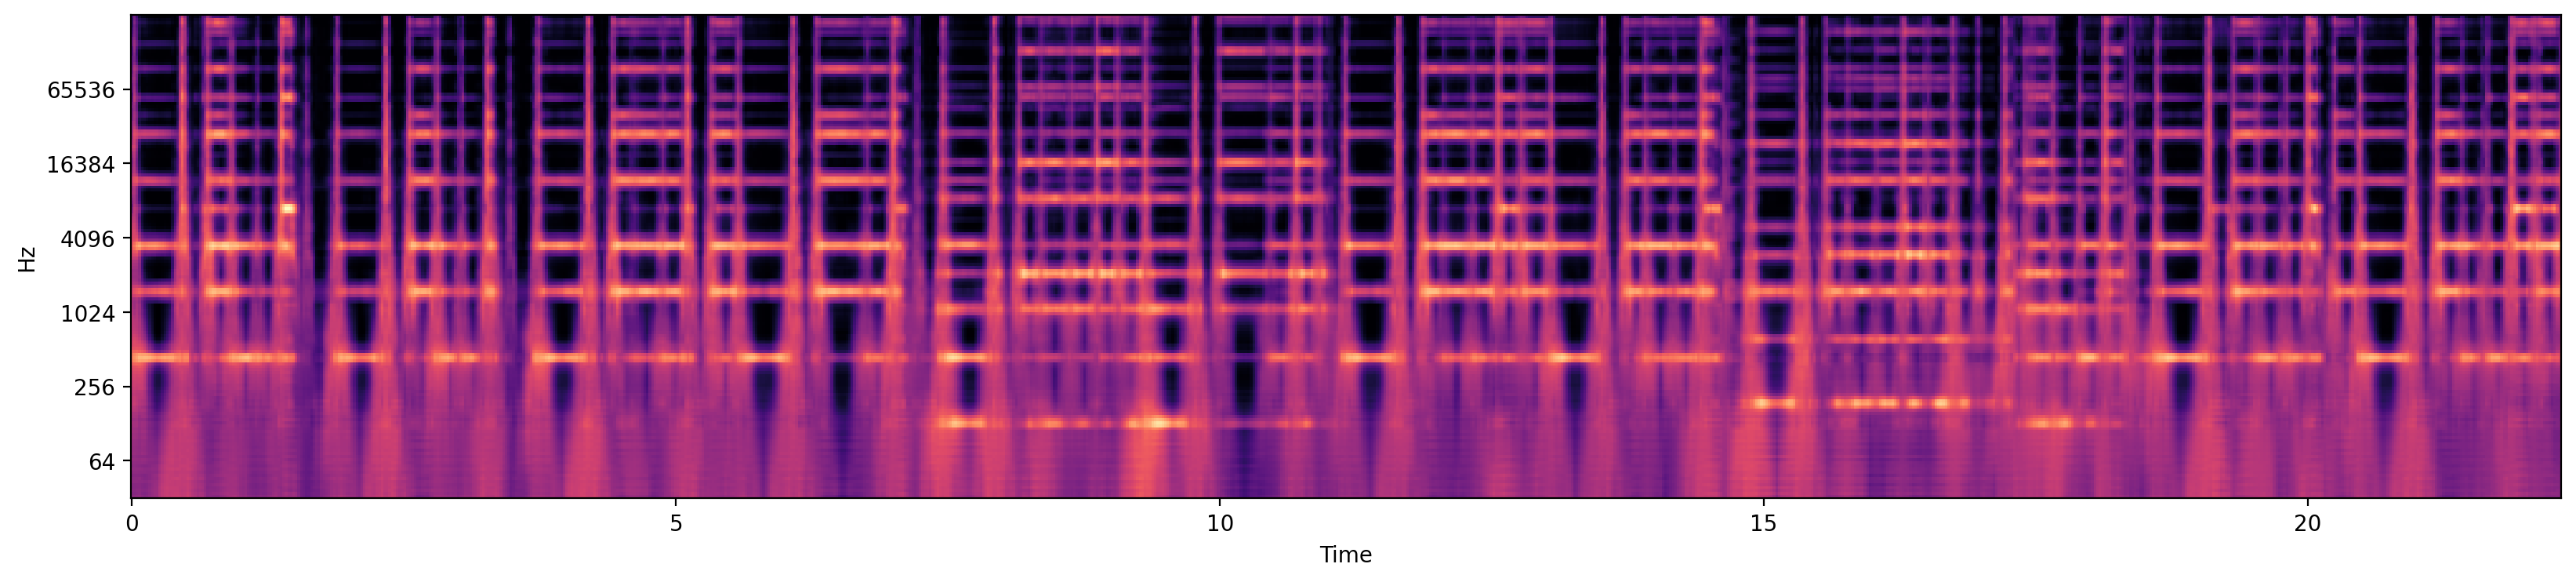

(156, 962)

In [43]:
ctqnormnew = nmf(CQT_norm)
myplot(ctqnormnew)
ctqnormnew.shape

In [28]:
import matplotlib.pyplot as plt
from dataloader import *


In [29]:

# Create dataset instance
dataset = GuitarSetDataset()

# Get the first item (index 0)
cqt_tensor, midi_tensor = dataset[0]

# Convert tensors to NumPy arrays for visualization
cqt_array = cqt_tensor.numpy()
midi_array = midi_tensor.numpy()


Spectrogram Shape (CQT): (156, 1241)


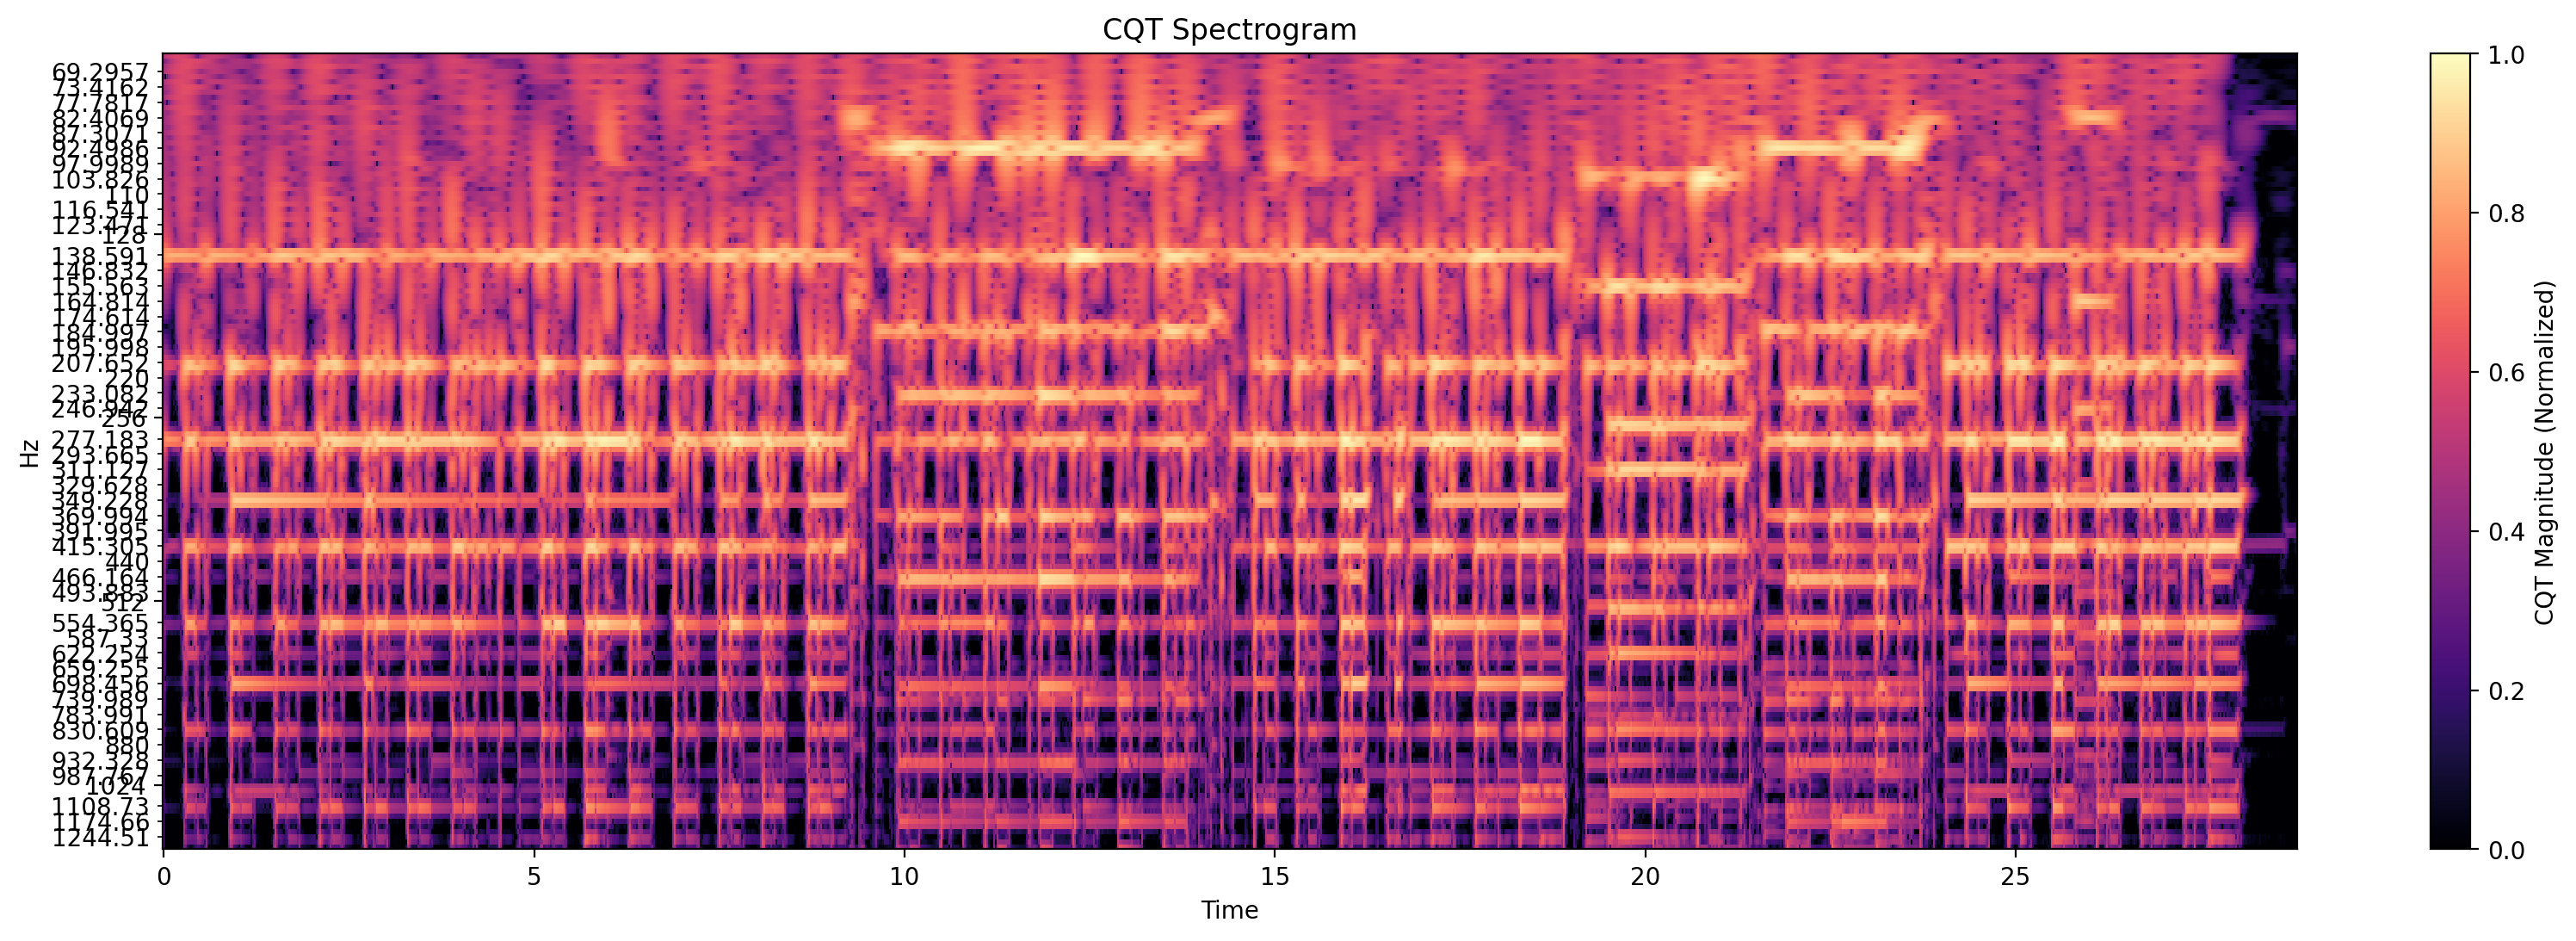

In [32]:

# Print the spectrogram shape
print("Spectrogram Shape (CQT):", cqt_array.shape)  # Expected shape: (156, Time Frames)

# Plot the spectrogram
plt.figure(figsize=(20, 6))
librosa.display.specshow(cqt_array, sr=SR, x_axis='time', y_axis='cqt_hz', fmin=FMIN, bins_per_octave=BINS_PER_OCTAVE)
plt.colorbar(label="CQT Magnitude (Normalized)")
plt.title("CQT Spectrogram")
plt.gca().invert_yaxis()
plt.show()


/opt/anaconda3/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


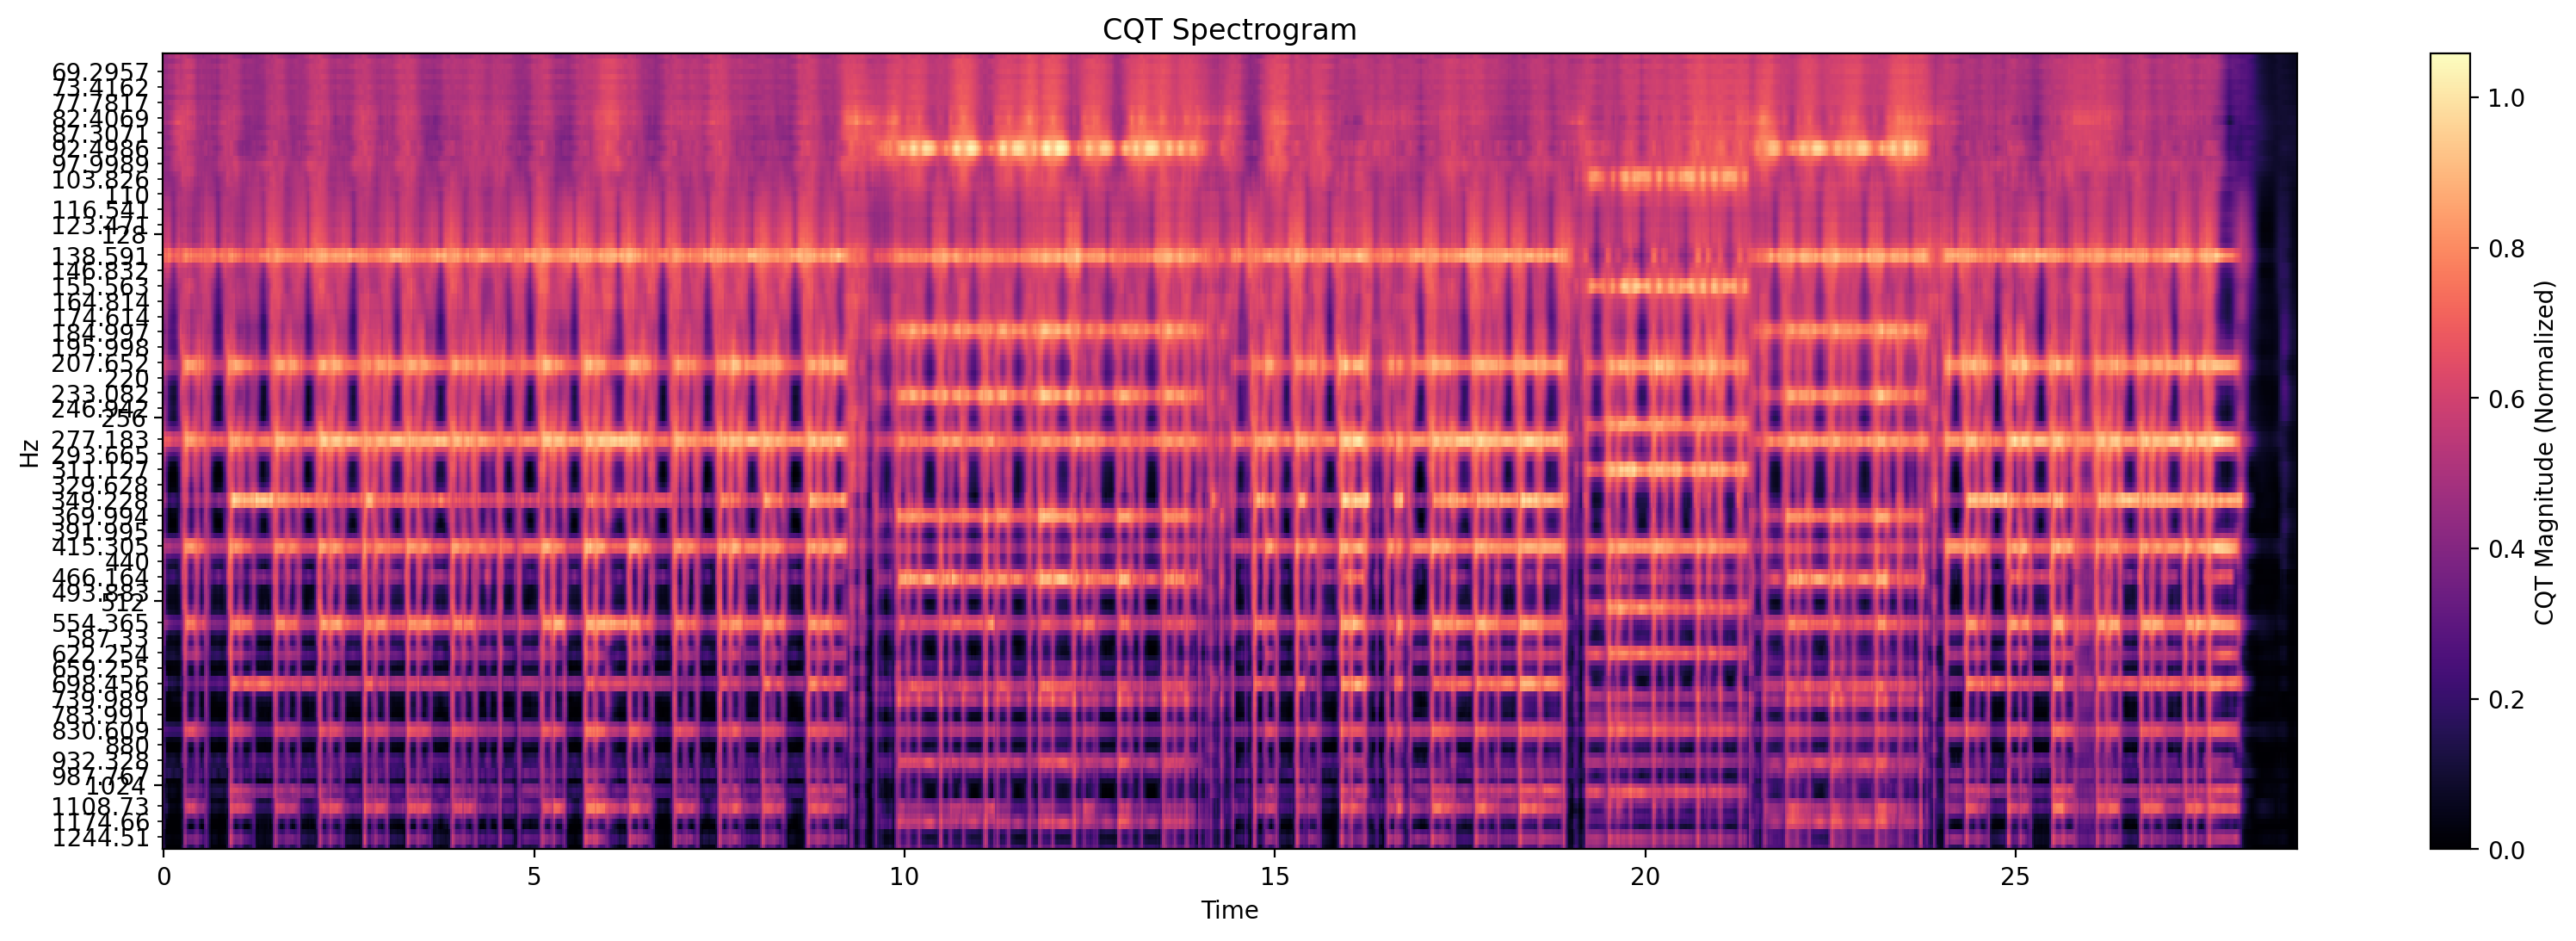

In [34]:
cqtnew = nmf(cqt_array)
plt.figure(figsize=(20, 6))
librosa.display.specshow(cqtnew, sr=SR, x_axis='time', y_axis='cqt_hz', fmin=FMIN, bins_per_octave=BINS_PER_OCTAVE)
plt.colorbar(label="CQT Magnitude (Normalized)")
plt.title("CQT Spectrogram")
plt.gca().invert_yaxis()
plt.show()


In [33]:

# Print MIDI annotations shape and first few elements
print("MIDI Shape:", midi_array.shape)  # Expected shape: (num_notes, 3) -> (time, duration, midi_pitch)
print("First MIDI Entries:\n", midi_array[:5])  # Print first 5 annotations


MIDI Shape: (368, 3)
First MIDI Entries:
 [[ 9.287707    0.22639456 39.958496  ]
 [ 9.628116    0.26122448 41.99846   ]
 [ 9.889816    0.27283448 41.970272  ]
 [10.167933    0.6211338  42.038445  ]
 [10.804601    0.59791386 42.012268  ]]


In [35]:
##HOW TO SMOOTH SPECTROGRAM? GAUSS?

##HOW TO COMPUTE PREDICTIONS? WINDOW?

##CNN VS TCN

##LOSS? SIGMOID AND MSE OR BINARY CROSS ENTROPY LOSS?

##WHICH DATASETS?